In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from tqdm import tqdm
from scipy.stats.stats import spearmanr, pearsonr
import re
import numpy as np
import gseapy

/cellar/users/snwright/anaconda3/envs/pcnet_py3/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.1.0)/charset_normalizer (2.0.7) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


# Import annotation data

In [94]:
def parse_edge_file(edge_file):
    g = pd.read_csv(edge_file, sep="\t")
    e = g.apply(lambda x: (x.Entrez_A, x.Entrez_B), axis=1)
    edge_dict = count_edges
    
    
## what is happening here? Where does the first edge dict come from?


def parse_file_network(node_file, edge_file, node_dict, edge_dict):
    n = pd.read_csv(node_file)
    g = pd.read_csv(edge_file, sep="\t")
    e = g.apply(lambda x: (x.Entrez_A, x.Entrez_B), axis=1)
    node_dict = count_nodes(node_dict, n.Unique_Nodes.values)
    edge_dict = count_edges(edge_dict, e)
    return node_dict, edge_dict

def count_nodes(node_dict, nodes):
    for node in nodes:
        node_dict[node] += 1
    return node_dict

def count_edges(edge_dict, edges):
    for edge in edges:
        edge = list(edge)
        edge.sort()
        edge = tuple(edge)
        edge_dict[edge] += 1
    return edge_dict

In [95]:
primary = ['havugimana\n', 'wan\n', 'proper_all\n', 'bioplex.v3.293T\n',
 'bioplex.v3.HCT116\n','hi.union\n', 'hein\n']

In [96]:
with open('/cellar/users/snwright/Git/Network_Evaluation_Tools/Data/aim2_prefixes.txt') as f:
    network_list = f.readlines()
datadir = "/cellar/users/snwright/Data/Network_Analysis/Processed_Data/v2_2022/"
exclude_net = ['proper\n', 'apid.1\n', 'apid.2\n', 'comppi_interactions\n']
node_files = [datadir + net.split("\n")[0]+".nodelist" for net in network_list if net not in exclude_net]
edge_files = [datadir + net.split("\n")[0]+"_net.txt" for net in network_list if net not in exclude_net]

In [97]:
primary_node_files = [datadir + net.split("\n")[0]+".nodelist" for net in primary]
primary_edge_files = [datadir + net.split("\n")[0]+"_net.txt" for net in primary]

In [98]:
if False:
    v2_nodes = defaultdict(int)
    v2_edges = defaultdict(int)
    for i in tqdm(range(len(node_files))):
        v2_nodes, v2_edges = parse_file_network(node_files[i], edge_files[i],v2_nodes, v2_edges)
    node_df = pd.DataFrame.from_dict(v2_nodes, orient='index')
    pd.DataFrame.from_dict(v2_nodes, orient='index').to_csv("temp_node_counts_aim2.csv")
    pd.DataFrame.from_dict(v2_edges, orient='index').to_csv("temp_edge_counts_aim2.csv")
    

In [99]:
if True:
    pv2_nodes = defaultdict(int)
    pv2_edges = defaultdict(int)
    for i in tqdm(range(len(primary_node_files))):
        pv2_nodes, pv2_edges = parse_file_network(primary_node_files[i], primary_edge_files[i],pv2_nodes, pv2_edges)
    pnode_df = pd.DataFrame.from_dict(pv2_nodes, orient='index')
    pd.DataFrame.from_dict(pv2_nodes, orient='index').to_csv("temp_node_counts_primary.csv")
    pd.DataFrame.from_dict(pv2_edges, orient='index').to_csv("temp_edge_counts_primary.csv")
    

100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


In [100]:
node_df = pd.read_csv("temp_node_counts_aim2.csv", index_col=0, names=["DB_count"])

In [101]:
pnode_df = pd.read_csv("temp_node_counts_primary.csv", index_col=0, names=["DB_count"])

In [102]:
node_df.head()

,DB_count
NaN,0
79902.0,32
79813.0,33
93627.0,28
22931.0,31


### Get annotations from HGNC

In [2]:
hgnc = pd.read_csv("/cellar/users/snwright/Data/Network_Analysis/Reference_Data/HGNC_download_March28_2023.txt", sep="\t")
hgnc = hgnc.dropna(subset=['NCBI Gene ID(supplied by NCBI)'])
hgnc['NCBI Gene ID(supplied by NCBI)'] = hgnc['NCBI Gene ID(supplied by NCBI)'].astype(int)
hgnc.rename(columns={'NCBI Gene ID(supplied by NCBI)':"GeneID"}, inplace=True)

In [10]:
hgnc[hgnc["Chromosome"]=='reserved']

,Approved symbol,Status,Chromosome,RefSeq IDs,Locus type,Locus group,Gene group name,NCBI Gene ID,UniProt ID(supplied by UniProt),GeneID
4259,G6PR,Approved,reserved,NaN,unknown,other,NaN,2541.0,NaN,2541
4512,GPR36,Approved,reserved,NaN,unknown,other,NaN,2860.0,NaN,2860
5025,IGKV1OR-4,Approved,reserved,NaN,immunoglobulin pseudogene,pseudogene,Immunoglobulin kappa (IGK) orphons,3534.0,NaN,3534
5653,MSBP1,Approved,reserved,NaN,unknown,other,NaN,4431.0,NaN,4431
5654,MSBP2,Approved,reserved,NaN,unknown,other,NaN,4432.0,NaN,4432
7581,TBXA1R,Approved,reserved,NaN,unknown,other,NaN,6914.0,NaN,6914
10308,CRSP5,Approved,reserved,NaN,unknown,other,NaN,10688.0,NaN,10688
10836,NR1I4,Approved,reserved,NaN,unknown,other,NaN,22817.0,NaN,22817
35281,LGTN,Approved,reserved,NaN,unknown,other,NaN,100529141.0,NaN,100529141


### Get annotations from Ensembl

In [8]:
ensem = pd.read_csv("/cellar/users/snwright/Data/Network_Analysis/Reference_Data/Ensembl_export_March28_2023.txt", sep="\t")
ensem.drop(columns=["GO domain"], inplace=True)
ensem.rename(columns={'NCBI gene (formerly Entrezgene) ID':"GeneID"}, inplace=True)
ensem.drop_duplicates(inplace=True)
ensem_no_transcript = ensem.drop(columns=['Transcript stable ID', 'Transcript type', 'Transcript length (including UTRs and CDS)']).drop_duplicates()
ensem_no_transcript["Gene length"] = ensem_no_transcript['Gene end (bp)'] - ensem_no_transcript['Gene start (bp)']
ensem_no_transcript["Protein Coding"] = ensem_no_transcript['Gene type'].apply(lambda x: True if x == "protein_coding" else False)


In [9]:
ensem.head()

,Gene stable ID,Transcript stable ID,Gene start (bp),Gene end (bp),Transcript length (including UTRs and CDS),Gene % GC content,Gene type,Transcript type,GeneID,HGNC symbol
0,ENSG00000210049,ENST00000387314,577,647,71,40.85,Mt_tRNA,Mt_tRNA,NaN,MT-TF
2,ENSG00000211459,ENST00000389680,648,1601,954,45.49,Mt_rRNA,Mt_rRNA,NaN,MT-RNR1
4,ENSG00000210077,ENST00000387342,1602,1670,69,42.03,Mt_tRNA,Mt_tRNA,NaN,MT-TV
5,ENSG00000210082,ENST00000387347,1671,3229,1559,42.81,Mt_rRNA,Mt_rRNA,NaN,MT-RNR2
7,ENSG00000209082,ENST00000386347,3230,3304,75,38.67,Mt_tRNA,Mt_tRNA,NaN,MT-TL1


 ### Get citation counts

In [105]:
cite = pd.read_csv("/cellar/users/snwright/Data/Network_Analysis/Reference_Data/gene_citation_counts.txt", sep="\t", header=None)
cite.columns = ["GeneID", "CitationCount"]

### Get uniprot data

In [106]:
uni = pd.read_csv("/cellar/users/snwright/Data/Network_Analysis/Reference_Data/Uniprot_length_mass.tsv", sep="\t", 
                    names=["GeneID", "aa_length", "mass"], header=0, dtype=int)


In [107]:
uni.head()

,GeneID,aa_length,mass
0,23074,1464,164199
1,102724631,384,43065
2,645104,232,25446
3,79658,786,89375
4,340069,330,37158


# Functions

In [108]:
def plot_dists():
    pass

def quant_compare(data_df, node_df, col1, col2, plot=False, stat='spearman', color=None, color_order=None):
    df = data_df.merge(node_df, left_on='GeneID', right_index=True, how='left')
    df["inDBs"] = ((df[col2] != 0) & (~df[col2].isna())).values
    print(df["inDBs"].value_counts())
    if stat == "spearman":
        res = spearmanr(df.dropna(subset=[col1, col2]).loc[df["inDBs"]].loc[:, (col1, col2)], axis=0, nan_policy='omit')
    elif stat == "pearson":
        res = pearsonr(x = df.dropna(subset=[col1, col2]).loc[df["inDBs"]][col1], y=df[col2]) 
    stats = df[col1].describe()
    log_scale = 10 if stats["max"]/stats["min"] > 1000 else None
    if plot:
        
        _, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), gridspec_kw={})
        sns.scatterplot(data=df.dropna(subset=[col1, col2]).loc[df["inDBs"]], x=col1, y=col2, ax=ax1, hue=color, edgecolors='face', alpha=0.5, hue_order=color_order)
        if log_scale:
            ax1.set_xscale("log")
        sns.histplot(data=df.dropna(subset=[col1]), x=col1, hue="inDBs", ax=ax2, hue_order=[True, False], log_scale=log_scale)
    return res

def parse_chrm(chr_str):
    chr_map = {'mitochondria':'MT', 'reserved':'other', "unplaced":'other', 'not on reference assembly':'other'}
    if chr_str in chr_map:
        return chr_map[chr_str]
    match = re.search(r'^(Y|X|\d+(?:\.\d+)?)', chr_str)
    if match:
        return match.group()
    else:
        print(chr_str)
        

# Quantitative Comparisons

### DBs vs GC-content

False    26266
True     23451
Name: inDBs, dtype: int64


SpearmanrResult(correlation=-0.05341925378790285, pvalue=2.7031362991674336e-16)

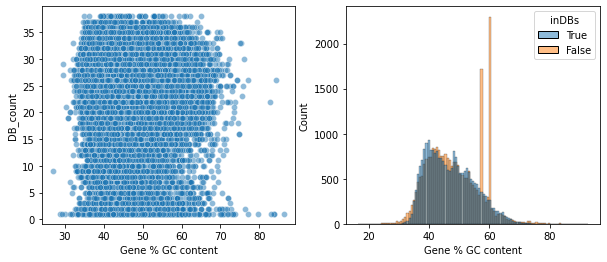

In [109]:
quant_compare(ensem_no_transcript, node_df, "Gene % GC content", "DB_count", plot=True)

### DBs vs Gene-length

False    26266
True     23451
Name: inDBs, dtype: int64


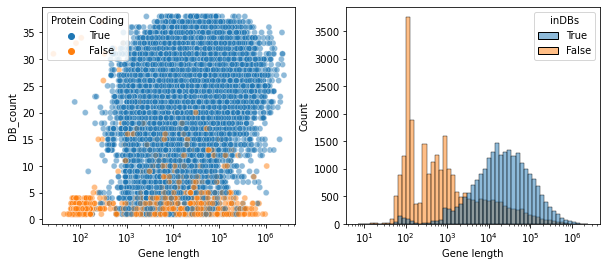

In [110]:
quant_compare(ensem_no_transcript, node_df, col1="Gene length", col2="DB_count", plot=True, stat='spearman', color="Protein Coding", color_order=[True, False])
plt.savefig("/cellar/users/snwright/Data/Transfer/pcnet/figures/DB_count_vs_gene_length.png", dpi=400, bbox_inches="tight")

True     22101
False      710
Name: inDBs, dtype: int64


SpearmanrResult(correlation=0.21768259103995763, pvalue=2.7285808010017543e-235)

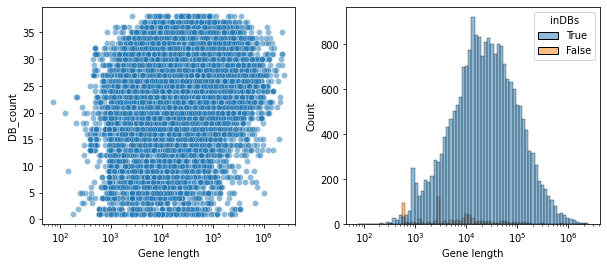

In [111]:
quant_compare(ensem_no_transcript[ensem_no_transcript['Protein Coding']], node_df, col1="Gene length", col2="DB_count", plot=True, stat='spearman')


### DBs vs protein size

True     18775
False       31
Name: inDBs, dtype: int64


SpearmanrResult(correlation=0.11154538812468695, pvalue=4.7457984413893015e-53)

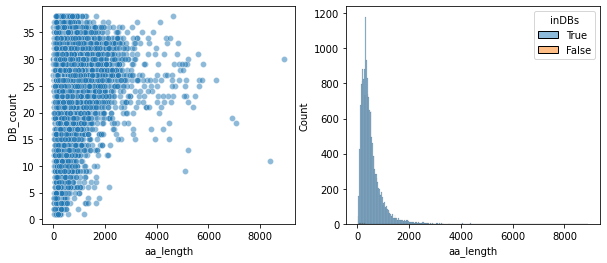

In [112]:
quant_compare(uni, node_df, col1="aa_length", col2="DB_count", plot=True, stat="spearman")

True     18775
False       31
Name: inDBs, dtype: int64


SpearmanrResult(correlation=0.11316299131831188, pvalue=1.477060506351812e-54)

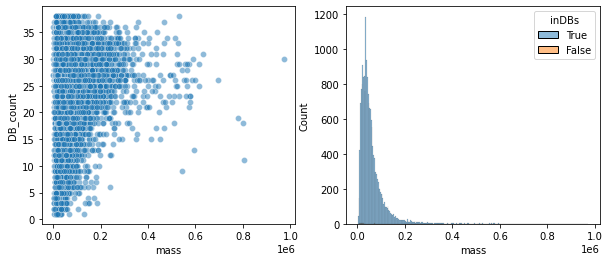

In [113]:
quant_compare(uni, node_df, col1="mass", col2="DB_count", plot=True, stat="spearman")

### DBs vs literature evidence

In [114]:
def quant_compare2(data_df, node_df, col1, col2, plot=False, stat='spearman', color=None, color_order=None, xsize=10):
    df = data_df.merge(node_df, left_on='GeneID', right_index=True, how='left')
    df["inDBs"] = ((df[col2] != 0) & (~df[col2].isna())).values
    print(df["inDBs"].value_counts())
    if stat == "spearman":
        res = spearmanr(df.dropna(subset=[col1, col2]).loc[df["inDBs"]].loc[:, (col1, col2)], axis=0, nan_policy='omit')
    elif stat == "pearson":
        res = pearsonr(x = df.dropna(subset=[col1, col2]).loc[df["inDBs"]][col1], y=df[col2]) 
    stats = df[col1].describe()
    log_scale = 10 if stats["max"]/stats["min"] > 1000 else None
    _ = plt.figure(figsize=(xsize, 4))
    if plot:
        sns.boxplot(data=df.dropna(subset=[col1, col2]).loc[df["inDBs"]], x=col2, y=col1,  fliersize=1)

    return res

In [115]:
protein_coding_genes_df = hgnc.loc[hgnc["Locus group"] == "protein-coding gene", ("GeneID")]
protein_coding_genes = protein_coding_genes_df.values
protein_coding_genes_df.to_csv("/cellar/users/snwright/Git/Network_Evaluation_Tools/Data/protein_coding_genes.txt", index=False)

In [116]:
node_df = node_df[~node_df.index.isna()]

In [117]:
node_df.index = [int(i) for i in node_df.index]
node_df.head()

,DB_count
79902,32
79813,33
93627,28
22931,31
54852,25


In [118]:
not_in_dbs = [g for g in protein_coding_genes if g not in node_df.index]
not_in_db_df = pd.DataFrame({"DB_count":0}, index = not_in_dbs)
node_df = pd.concat([node_df, not_in_db_df])

False    92416
True     19132
Name: inDBs, dtype: int64


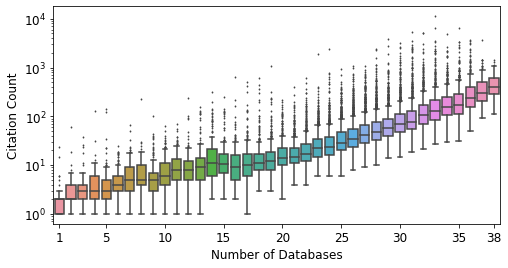

In [119]:
x = quant_compare2(cite, node_df.loc[protein_coding_genes], col1="CitationCount", col2="DB_count", plot=True, stat="spearman",
                  xsize=8)
plt.yscale("log")
ax = plt.gca()
_ =ax.set_xticks([0,4,9,14,19,24, 29, 34, 37], labels=[str(int(i)) for i in [1,5,10,15,20,25, 30, 35, 38]])
ax.tick_params(labelsize=12)
ax.set_xlabel("Number of Databases", fontsize=12)
ax.set_ylabel("Citation Count", fontsize=12)
plt.savefig("/cellar/users/snwright/Data/Transfer/pcnet/figures/DB_count_vs_citation_count_box.png", dpi=400, bbox_inches="tight")

In [187]:
def quant_compare2(data_df, node_df, col1, col2, plot=False, stat='spearman', color=None, color_order=None, xsize=10):
    df = data_df.merge(node_df, left_on='GeneID', right_index=True, how='left')
    df["inDBs"] = ((df[col2] != 0) & (~df[col2].isna())).values
    print(df["inDBs"].value_counts())
    if stat == "spearman":
        res = spearmanr(df.dropna(subset=[col1, col2]).loc[df["inDBs"]].loc[:, (col1, col2)], axis=0, nan_policy='omit')
    elif stat == "pearson":
        res = pearsonr(x = df.dropna(subset=[col1, col2]).loc[df["inDBs"]][col1], y=df[col2]) 
    stats = df[col1].describe()
    log_scale = 10 if stats["max"]/stats["min"] > 1000 else None
    _ = plt.figure(figsize=(xsize, 1.5))
    if plot:
        sns.boxplot(data=df.dropna(subset=[col1, col2]).loc[df["inDBs"]], x=col2, y=col1,  fliersize=0.5, linewidth=0.5)

    return res

In [121]:
plt.rcParams['svg.fonttype'] = 'none'

False    94627
True     16921
Name: inDBs, dtype: int64


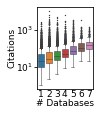

In [188]:
x = quant_compare2(cite, pnode_df, col1="CitationCount", col2="DB_count", plot=True, stat="spearman", xsize=1)
plt.yscale("log")
ax = plt.gca()
_ =ax.set_xticks([0,1,2,3,4,5, 6], labels=[str(int(i)) for i in [1,2,3,4,5,6, 7]])
ax.tick_params(labelsize=9, pad=0.1)
ax.tick_params(length=0, axis='x', pad=1)
ax.set_xlabel("# Databases", fontsize=9, labelpad=0.1)
ax.set_ylabel("Citations", fontsize=9, labelpad=0.1)
plt.savefig("/cellar/users/snwright/Data/Transfer/pcnet/figures/DB_count_vs_citation_count_box_primary.svg", dpi=400, bbox_inches="tight")

In [123]:
df = cite.merge(pnode_df, left_on='GeneID', right_index=True, how='left')

In [190]:
x

SpearmanrResult(correlation=0.481985918659004, pvalue=0.0)

# Categorical Comparisons

### DBs and Gene type (HGNC)

In [125]:
def get_counts_by_db_presence(data, col1, db_col):
    res = {}
    for group in data[col1].unique():
        res[group] = data[data[col1]==group][db_col].value_counts().to_dict()
    res_df = pd.DataFrame.from_dict(res).T.melt(ignore_index=False, var_name=db_col, value_name="Count")
    res_df[col1] = res_df.index
    return res_df.reset_index(drop=True)



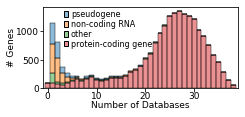

In [181]:
plot_data = hgnc.merge(node_df, left_on="GeneID", right_index=True, how="left")
plot_data["inDBs"] = ((plot_data["DB_count"] != 0) & (~plot_data["DB_count"].isna())).values
_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3.5, 1.5)) #, gridspec_kw={'width_ratios':[0.7, 0.3]})
res = sns.histplot(
    data=plot_data, ax=ax1,
    x="DB_count", multiple='stack',alpha=0.5,
    hue="Locus group", stat='count', common_bins=True, bins=[i for i in range(40)], discrete=True,
    line_kws={"mew":0}
)
sns.move_legend(res, (0.09,0.45), fontsize=8, title="", frameon=False, labelspacing=0.1, handletextpad=0.4,
               handlelength=0.5)
ax1.tick_params(labelsize=9,pad=0 )
counts = get_counts_by_db_presence(plot_data, "Locus group", "inDBs")
ax1.set_xlabel("Number of Databases", fontsize=9, labelpad=0.1)
ax1.set_ylabel("# Genes", fontsize=9, labelpad=0.1)
ax1.set_xlim(-1, 39)
plt.savefig("/cellar/users/snwright/Data/Transfer/pcnet/figures/locus_distribution.svg", dpi=400, bbox_inches='tight')

ValueError: The number of FixedLocator locations (26), usually from a call to set_ticks, does not match the number of ticklabels (4).

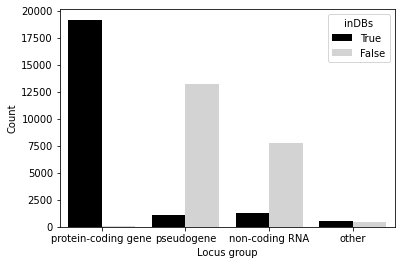

In [127]:
res2 = sns.barplot(data=counts , x='Locus group', y="Count", hue="inDBs", alpha=1, order=["protein-coding gene", 'pseudogene', 'non-coding RNA', 'other'],
            hue_order=[True, False], palette=["black", "lightgrey"])
_= ax2.set_xticklabels(["Protein Coding", "Pseudogene", "ncRNA", "other"], rotation=90)
sns.move_legend(res2, (0.55,0.7), fontsize=12, title="In >0 DBs", title_fontsize=12)
ax2.tick_params(labelsize=12)
ax2.set_xlabel("")

ax2.set_ylabel("")

#plt.savefig("/cellar/users/snwright/Data/Transfer/pcnet/figures/DB_counts_by_locus_group.png", dpi=400, bbox_inches='tight')

### DBs and gene group (HGNC)

In [135]:
def violin_comparison(data_df, node_df, cat_col, db_col="DB_count", non_db="separate", order=None):
    df = data_df.merge(node_df, left_on="GeneID", right_index=True, how="left")
    df["inDBs"] = ((df[db_col] != 0) & (~df[db_col].isna())).values
    db_counts = data_df.loc[df["inDBs"]][cat_col].value_counts()
    non_db_counts = data_df.loc[~df["inDBs"]][cat_col].value_counts()
    count_df = pd.DataFrame(db_counts).join(pd.DataFrame(non_db_counts), lsuffix=' inDB', rsuffix=' nonDB')
    count_df[count_df.isna()] = 0
    if order is not None:
        count_df = count_df.loc[order]
    if non_db == "stack":
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 5), gridspec_kw={'height_ratios':[1,2], 'hspace':0.1})
        p = sns.barplot(x=count_df.index, y=count_df[cat_col + " inDB"], ax=ax1, orientation='vertical')
        p = sns.barplot(x=count_df.index, y=count_df[cat_col + " nonDB"], ax=ax1, orientation='vertical', 
                        bottom=count_df[cat_col + " inDB"], color='lightgrey')
        violin_ax = ax2
        bar_ax=ax1
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15, 5), gridspec_kw={'height_ratios':[1,1,2], 'hspace':0.1})
        violin_ax = ax3
        bar_ax=ax2
        p = sns.barplot(x=count_df.index, y=count_df[cat_col + " inDB"], ax=ax2, orientation='vertical')
        count_df["sum"] = count_df.sum(axis=1)
        p = sns.barplot(x=count_df.index, y=count_df[cat_col + " inDB"]/count_df["sum"], ax=ax1, orientation='vertical')
        p = sns.barplot(x=count_df.index, y=count_df[cat_col + " nonDB"]/count_df["sum"], ax=ax1, orientation='vertical', 
                        bottom=1-count_df[cat_col + " nonDB"]/count_df["sum"], color="lightgrey")
        ax1.set_ylabel("Representation")
        
    bar_ax.set_yscale("log")
    
    for i, p in enumerate(bar_ax.patches):
        if non_db == "stack":
            if i < len(bar_ax.patches)/2:
                bar_ax.text(p.get_x() + p.get_width()/2., (10**(np.log10(p.get_height())/2)), '%.0f' % p.get_height(), 
                    fontsize=8, color='black', ha='center', va='top')
                p2 = ax1.patches[i+int(len(ax1.patches)/2)]
                bar_ax.text(p2.get_x() + p2.get_width()/2., p.get_height(), '%.0f' % p2.get_height(), 
                    fontsize=8, color='black', ha='center', va='bottom')
        else:
            bar_ax.text(p.get_x() + p.get_width()/2., (10**(np.log10(p.get_height())/2)), '%.0f' % p.get_height(), 
                fontsize=8, color='black', ha='center', va='top')
    if non_db == "separate":
        for i, p in enumerate(ax1.patches):
            if i < len(ax1.patches)/2:
                ax1.text(p.get_x() + p.get_width()/2., 0, '%.1f' % (p.get_height()*100)+"%", 
                    fontsize=8, color='black', ha='center', va='bottom')
    bar_ax.set_ylabel("# Genes in\ngroup")
    if order is None:
        order =count_df.index
    sns.violinplot(data=df[df["inDBs"]], x=cat_col, y=db_col, ax=violin_ax, cut=0, scale='width', order=order)
    violin_ax.tick_params(rotation=90, labelsize=14)
    return df, (ax1, ax2)
    
    
    

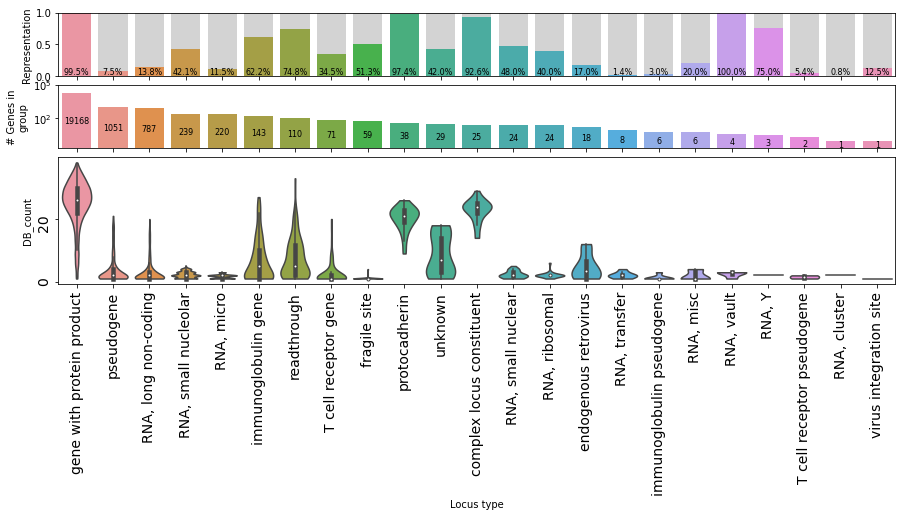

In [136]:
df, x = violin_comparison(hgnc, node_df, "Locus type", non_db="separate")
_ = x[1].set_ylim((0.2, 100000))


## DBs and gene group (Ensembl)

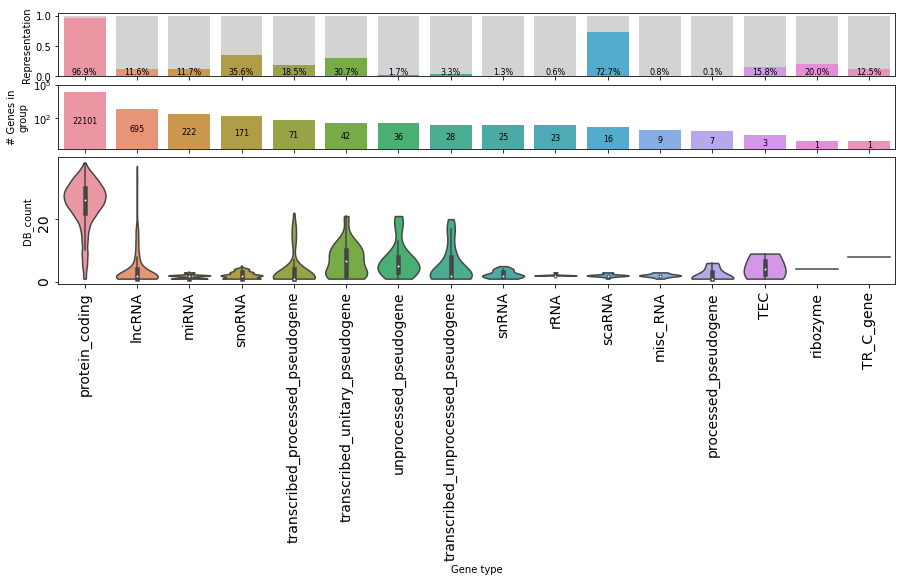

In [130]:
x = violin_comparison(ensem_no_transcript, node_df, "Gene type", non_db="separate")
_ = x[1].set_ylim((0.2, 100000))

## DBs and chromosome

In [131]:
hgnc.Chromosome = hgnc.Chromosome.apply(parse_chrm)

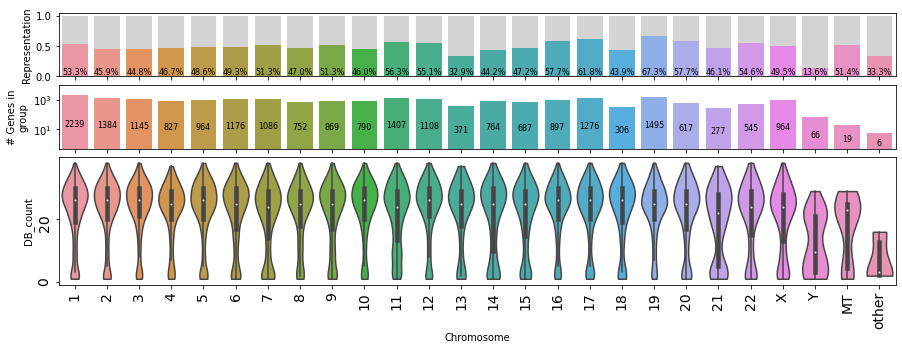

In [132]:
x = violin_comparison(hgnc, node_df, "Chromosome", non_db="separate",order=[str(i) for i in range(1, 23)]+['X', 'Y', 'MT', 'other'])
_ = x[1].set_ylim((0.5, 10000))

#### Chromosome size

In [133]:
chr_size=pd.read_csv("/cellar/users/snwright/Data/Transfer/Data/chrom_sizes.csv", header=None, names= ['Chromosome','Size'])

ValueError: Could not interpret input 'DB_count'

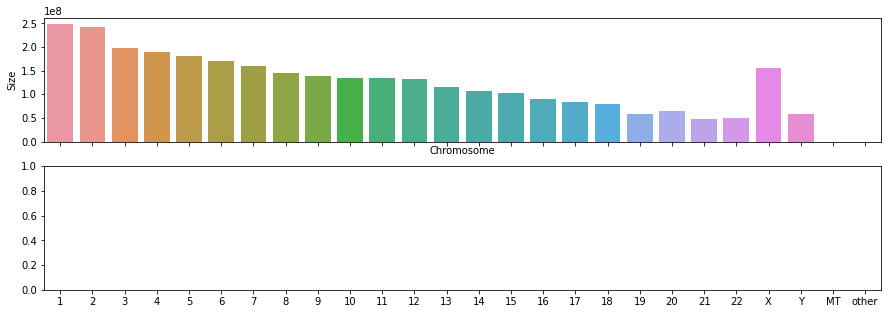

In [134]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 5))
sns.barplot(data=chr_size, x= 'Chromosome', y='Size', ax=ax1, orientation='vertical', order=[str(i) for i in range(1, 23)]+['X', 'Y', 'MT', 'other'])
sns.violinplot(data=hgnc, x='Chromosome', y="DB_count", ax=ax2, order=[str(i) for i in range(1, 23)]+['X', 'Y', 'MT', 'other'], cut=0)

In [91]:
hgnc.head()

,Approved symbol,Status,Chromosome,RefSeq IDs,Locus type,Locus group,Gene group name,NCBI Gene ID,UniProt ID(supplied by UniProt),GeneID
0,PARP4P3,Approved,22,NaN,pseudogene,pseudogene,NaN,NaN,NaN,107133524
1,MTND4LP11,Approved,10,NaN,pseudogene,pseudogene,NaN,NaN,NaN,107075238
2,SHANK2-AS2,Approved,11,NaN,"RNA, long non-coding",non-coding RNA,Antisense RNAs,NaN,NaN,100874199
3,LINC01525,Approved,1,NaN,"RNA, long non-coding",non-coding RNA,Long intergenic non-protein coding RNAs,NaN,NaN,104355292
5,NENFP3,Approved,5,NaN,pseudogene,pseudogene,NaN,NaN,NaN,106481703


In [191]:
df.head()

,Approved symbol,Status,Chromosome,RefSeq IDs,Locus type,Locus group,Gene group name,NCBI Gene ID,UniProt ID(supplied by UniProt),GeneID,DB_count,inDBs
0,PARP4P3,Approved,22,NaN,pseudogene,pseudogene,NaN,NaN,NaN,107133524,NaN,False
1,MTND4LP11,Approved,10,NaN,pseudogene,pseudogene,NaN,NaN,NaN,107075238,NaN,False
2,SHANK2-AS2,Approved,11,NaN,"RNA, long non-coding",non-coding RNA,Antisense RNAs,NaN,NaN,100874199,NaN,False
3,LINC01525,Approved,1,NaN,"RNA, long non-coding",non-coding RNA,Long intergenic non-protein coding RNAs,NaN,NaN,104355292,NaN,False
5,NENFP3,Approved,5,NaN,pseudogene,pseudogene,NaN,NaN,NaN,106481703,NaN,False


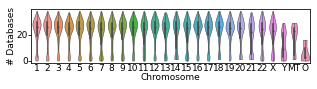

In [189]:
fig, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(5, 1))
#sns.barplot(data=chr_size, x= 'Chromosome', y='Size', ax=ax1, orientation='vertical', order=[str(i) for i in range(1, 23)]+['X', 'Y', 'MT', 'other'])
sns.violinplot(data=df, x='Chromosome', y="DB_count", ax=ax2, linewidth=0.5,inner='box',
               order=[str(i) for i in range(1, 23)]+['X', 'Y', 'MT', 'other'], cut=0)
ax2.tick_params(labelsize=9,pad=0 )
ax2.tick_params(axis='x', length=0, pad=0.7)
ax2.set_ylabel("# Databases", fontsize=9, labelpad=0.1)
ax2.set_xlabel("Chromosome", fontsize=9, labelpad=0.1)
_ = ax2.set_xticklabels([str(i) for i in range(1, 23)]+['X', 'Y', 'MT', 'O'])
#ax2.set_ylim(0, 39)
plt.savefig("/cellar/users/snwright/Data/Transfer/pcnet/figures/chromosoms.svg", dpi=400, bbox_inches="tight")

#### Gene type by chromosome

In [337]:
def get_chrom_num(chrom):
    if chrom.isdigit():
        return int(chrom)
    elif chrom == 'X':
        return 23
    elif chrom == 'Y':
        return 24
    elif chrom == 'MT':
        return 25
    elif chrom == 'other':
        return 26
    else:
        return -1

<AxesSubplot:xlabel='Chromosome', ylabel='Count'>

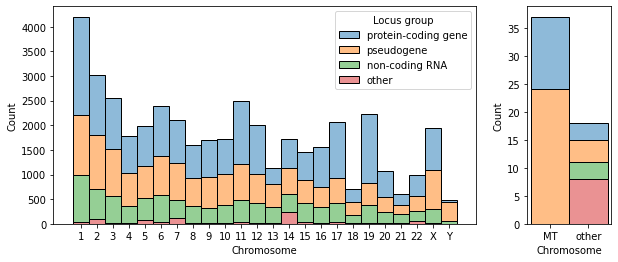

In [352]:
#TODO make colors match the previous plot using hue order
_ , (ax1, ax2) = plt.subplots(nrows=1, ncols=2, gridspec_kw={"width_ratios":[1, 0.2], 'wspace':0.2}, figsize=(10, 4))
chrom_data = hgnc.sort_values(by="Chromosome", key=lambda x: x.apply(get_chrom_num))
sns.histplot(data=chrom_data[chrom_data['Chromosome'].isin([str(i) for i in range(0, 23)]+["X", "Y"])] ,x='Chromosome', hue="Locus group", multiple="stack", alpha=0.5, ax=ax1)
sns.histplot(data=chrom_data[~chrom_data['Chromosome'].isin([str(i) for i in range(0, 23)]+["X", "Y"])] ,x='Chromosome', hue="Locus group", multiple="stack", alpha=0.5, ax=ax2, legend=None)

# GO representation

Use obonet to represent the onotology - much easier to work with.
* BP: GO:0008150
* CC: GO:0005575
* MF: GO:0003674

## GO Associations

Use goatools to download the association data

In [31]:
import networkx as nx
import obonet as obo
from goatools.base import download_ncbi_associations
from goatools.anno.genetogo_reader import Gene2GoReader
from fuzzywuzzy import fuzz, process
import warnings
from scipy.stats import fisher_exact

class GoData:
    """Class to load GO data and perform GO enrichment analysis.
    """
    def __init__(self, ontpath, taxid=9606, debug=None, assoc_source='ncbi', assoc_file=None):
        """Initialize the GoData object.
        Args:
            ontpath (str): Path to the ontology file. Can be a local path or a URL.
            taxid (int): NCBI Taxonomy ID of the species to use. Default is 9606 (human).
            debug (GoData): A previous GoData object to use for debugging. Default is None.
            associations (str): Path to the gene2go file. Can be a local path or a URL. Default is None.
            
        Returns:
            GoData: A GoData object.
        """
        assert assoc_source in ['mygene', 'ncbi', 'file'], "assoc_source must be one of ['mygene', 'goatools', 'file']"
        if assoc_source == 'file':
            assert assoc_file is not None, "assoc_file must be provided if assoc_source is 'file'"
        
        self.__ontpath = ontpath
        self.__taxid = taxid
        taxonomy_dict = {9606: 'Human', 10090: 'Mouse', 10116: 'Rat', 7227: 'Fruit fly', 
                    3702: 'Arabidopsis', 562: 'E. coli', 4932: 'S. cerevisiae', 
                    6239: 'C. elegans', 7955: 'Zebrafish', 9031: 'Chicken'}
        try:
            self.__species = taxonomy_dict[self.__taxid]
        except KeyError:
            warnings.warn("taxid not one of "+", ".join(taxonomy_dict.values()) +". Defaulting to species=human for GO Enrichment" , UserWarning)
            self.__species = "Human"

        # debug allows you to load a previous GoData object to update functions without reloading the data
        if debug is not None:
            self.go = debug.go
            self.id_to_name = debug.id_to_name
            self.name_to_id = debug.name_to_id
            self.geneid2go = debug.geneid2go
            self.go2geneid = debug.go2geneid
            self.assoc_file = debug.assoc_file
            self.assoc_source = debug.assoc_source
        else:
        # Ontology
            self.go = obo.read_obo(ontpath)
            self.id_to_name = {id_: data.get('name') for id_, data in self.go.nodes(data=True)}
            self.name_to_id = {data.get('name'): id_ for id_, data in self.go.nodes(data=True)}
            # Associations
            self.get_associations(assoc_source, assoc_file, taxid=taxid)
            
    def get_associations(self, assoc_source='ncbi', assoc_file=None, taxid=None):
        self.assoc_source = assoc_source
        self.assoc_file = assoc_file
        if self.assoc_source == 'file':
            assert assoc_file is not None, "assoc_file must be provided if assoc_source is 'file'"
        if self.assoc_source == 'mygene':
            raise(NotImplementedError)
            #geneid2go, go2geneid = self._map_using_mygene(gene_list, self.id_type)
        elif self.assoc_source == 'ncbi':
            geneid2go, go2geneid =  self._map_using_ncbi(taxid=taxid)
        elif self.assoc_source == 'file':
            raise(NotImplementedError)
            #geneid2go, go2geneid =  self._map_using_file(id_type=self.id_type)
        self.geneid2go = geneid2go
        self.go2geneid = go2geneid
    
    def _reverse_dict_of_sets(self, d):
        result = defaultdict(set)
        for k in d.keys():
            for v in d[k]:
                result[v].add(k)
        return result        

    def _map_using_ncbi(self, taxid=9606):
        if taxid is None:
            warnings.warn("taxid not provided. Defaulting to taxid=9606" , UserWarning)
            taxid = 9606
        gene2go = download_ncbi_associations()
        geneid2go = Gene2GoReader(gene2go, taxids=[taxid]).get_id2gos_nss(taxid=taxid)
        go2geneid = self._reverse_dict_of_sets(geneid2go)
        return geneid2go, go2geneid
    
    def get_subterms(self, node):
        """Get the direct subterms of a GO term, where subterms are represented as parents in the ontology.

        Args:
            node (str): The GO id of the term

        Returns:
            list: The GO ids of the subterms
        """
        subterm = []
        for parent, _ , _ in self.go.in_edges(node, keys=True):
            subterm.append(parent)
        return subterm

    def get_superterms(self, node):
        """Get the direct superterms of a GO term, where superterms are represented as children in the ontology.

        Args:
            node (str): The GO id of the term

        Returns:
            list: The GO ids of the superterms
        """
        superterm = []
        for _ , child, _ in self.go.out_edges(node, keys=True):
            superterm.append(child)
        return superterm

    def get_all_superterms(self, node):
        """Get all the superterms of a GO term, where superterms are represented as children in the ontology.

        Args:
            node (str): The GO id of the term

        Returns:
            list: The GO ids of the superterms
        """
        ancestors = [superterm for superterm in nx.descendants(self.go, node)]
        return ancestors

    def get_all_subterms(self, node):
        """Get all the subterms of a GO term, where subterms are represented as parents in the ontology.

        Args:
            node (str): The GO id of the term

        Returns:
            list: The GO ids of the subterms
        """
        descendents = [superterm for superterm in nx.ancestors(self.go, node)]
        return descendents
    
    def get_associated_genes(self, goID):
        """Get all the genes associated with a GO term, including genes associated with subterms.

        Args:
            goID (str): The GO id of the term

        Returns:
            set: The gene ids associated with the GO term
        """
        all_genes = self.go2geneid[goID]
        subterms = self.get_all_subterms(goID)
        for goid in subterms:
            all_genes = all_genes.union(self.go2geneid[goid])
        return all_genes
    
    def to_name(self, goID):
        """Convert a GO id to a GO name.

        Args:
            goID (str): The GO id of the term

        Returns:
            str: The GO name of the term
        """
        if type(goID) == int:
            goID = self.to_id(goID)
        assert goID in self.go.nodes, "ID "+ goID +" is not in the ontology."
        return self.id_to_name[goID]
    
    def to_id(self, name):
        """Convert a GO name or numerical suffix to a GO id. Where the name does not exactly match a GO term, 
        a list of possible matches is given in the error message.
        
        Args:
            name (str or int): The GO name or numerical suffix of the term
            
        Returns:
            str: The GO id of the term
        """
        if type(name) == int:
            id_ = "GO:" + "0" * (7-len(str(name))) + str(name)
            assert id_ in self.go.nodes, "ID "+id_+" is not in the ontology."
            return id_
        elif type(name) == str:
            assert name in self.name_to_id.keys(), name+" is not in the ontology. Maybe you meant (one of):\n" + "\n".join(self.get_fuzzy_go_terms(name))
            return self.name_to_id[name]
        
    def get_fuzzy_go_terms(self, term, max_terms=10):
        """Get a list of GO terms that are similar to the input term, using fuzzy matching.

        Args:
            term (str): The GO term to match
            max_terms (int, optional): The maximum number of terms to return. Defaults to 10.

        Returns:
            list: A list of GO terms that are similar to the input term
        """
        results = process.extract(term, self.name_to_id.keys(), scorer=fuzz.token_sort_ratio, limit=max_terms)
        for term, score in results:
            if score == 100:
                return [term]
        return [match[0] for match in results]
    
    def plot_go_counts(self, terms, min_gene=100, max_gene=20000, plot_title="None"):
        """Plot the number of genes associated with a GO term, and its subterms.
        
        Args:
            terms (str or list): The GO term or list of GO terms to plot
            min_gene (int, optional): The minimum number of genes to include in the plot. Defaults to 100.
            max_gene (int, optional): The maximum number of genes to include in the plot. Defaults to 20000.
            plot_title (str, optional): The title of the plot. Defaults to "None".
        
        Returns:
            None        
        """
        if type(terms) == str:
            root_term = terms
            terms = self.get_subterms(terms)
        else:
            if type(terms) == set:
                terms = list(terms)
            root_term = ""
        term_counts = {term:len(self.get_associated_genes(term)) for term in terms}
        keep_counts = {term:term_counts[term] for term in terms if (term_counts[term] >= min_gene) & (term_counts[term] <= max_gene)}
        if len(keep_counts) == 0:
            print("All terms excluded!\nMaximum count: ", max(term_counts.values()), 
                    "\nMinimum count: ", min(term_counts.values()))
            return
        print("Terms excluded:", len(terms) - len(keep_counts))
        plot_df = pd.DataFrame({'term':keep_counts.keys(), 'count':keep_counts.values()})
        plot_df.sort_values(by="count", ascending=False, inplace=True)
        _ = plt.figure(figsize=(15, 4))
        ax = plt.gca()
        sns.barplot(data=plot_df, x='term', y='count', ax=ax)
        ax.set_xticklabels([self.to_name(term) for term in plot_df["term"]], rotation=90)
        if root_term != "":
            ax.set_title(self.to_name(root_term))
        elif plot_title is not None:
            ax.set_title(plot_title)
        return ax
    
    def get_go_term_subset(self, root_term, min_size=100, max_size=1000):
        """Get a subset of GO terms that are within a certain size range, and are descendants of a root term.

        Args:
            root_term (str): The GO term to use as the root of the subset
            min_size (int, optional): The lower bound of the size range. Defaults to 100.
            max_size (int, optional): The upper bound of the size range. Defaults to 1000.

        Returns:
            set: The set of GO terms that are within the size range, and are descendants of the root term
        """
        stack = [root_term]
        visited_nodes = set()
        final_terms = set()
        # perform a modified depth first search with min and max size constraints
        while stack:
            term = stack.pop()
            # check if we have already visited this node, as graph may have cycles
            if term in visited_nodes:
                continue
            visited_nodes.add(term)
            # check if the term is within the size constraints
            term_size = len(self.get_associated_genes(term))
            if term_size < min_size:
                continue 
            # if the term is within the size constraints, add it to the final set
            if term_size >= min_size and term_size <= max_size:
                final_terms.add(term)
            # if the term is too large, add its subterms to the stack
            else:
                subterms = self.get_subterms(term)
                for subterm in subterms:
                    if subterm not in visited_nodes:
                        stack.append(subterm)
                    
        return final_terms
    
    def go_enrichment(self, gene_list, terms, background_genes=None, plot=False):
        """Perform a GO enrichment analysis on a list of genes.

        Args:
            gene_list (list): The list of genes to perform the enrichment analysis on
            terms (str or list): The GO term or list of GO terms to perform the enrichment analysis on
            background_genes (list, optional): The list of genes to use as the background. Defaults to None.
            plot (bool, optional): Whether to plot the results. Defaults to False.

        Returns:
            pandas.DataFrame: A dataframe containing the results of the enrichment analysis
        """
        # subset gene_list to those present in the ontology
        if background_genes is not None:
            if type(background_genes) == list:
                background_genes = set(background_genes)
            gene_list_present = [gene for gene in list(set(gene_list).intersection(background_genes)) if gene in self.geneid2go.keys()]
        else:
            gene_list_present = [gene for gene in gene_list if gene in self.geneid2go.keys()]
        
        if len(gene_list) - len(gene_list_present) >0:
            print("Warning: ", len(gene_list) - len(gene_list_present), " genes not in the ontology and/or background genes.")
        gene_list = gene_list_present
        #process the term list
        if type(terms) == str:
            terms = [terms]
        # Get the genes associated with each term
        term_genes = {term: self.get_associated_genes(term) for term in terms}
        if background_genes is not None:
            if type(background_genes) == list:
                background_genes = set(background_genes)
            term_genes = {term: term_genes[term].intersection(background_genes) for term in terms}
        # Count the number of genes in each term
        term_gene_counts = {term: len(term_genes[term]) for term in terms}
        # Count the number of genes in the gene set that are associated with each term
        term_gene_set_counts = {term: len(set(gene_list).intersection(term_genes[term])) for term in terms}
        # Calculate the p-value for each term using the Fisher's exact test
        p_values = {}
        expected = {}
        for term in terms:
            term_p, term_e = self._fisher_test(background_genes, term_gene_counts[term], term_gene_set_counts[term], gene_list)
            p_values[term] = term_p
            expected[term] = term_e
        
        # Sort the terms by p-value in ascending order
        sorted_terms = sorted(p_values, key=p_values.get)
        if len(sorted_terms) == 1:
            enriched_terms = pd.DataFrame({'Term': sorted_terms, 'P-value': [p_values[sorted_terms[0]]]})
        else:
            enriched_terms = pd.DataFrame({'Term': sorted_terms, 'P-value': [p_values[term] for term in sorted_terms]})
        enriched_terms["Term_size"] = enriched_terms.Term.apply(lambda x: term_gene_counts[x])
        enriched_terms["Intersection"] = enriched_terms.Term.apply(lambda x: term_gene_set_counts[x])
        if plot:
            self._plot_enrichment(enriched_terms, expected, p_values, terms, sorted_terms) 
        
        return enriched_terms
    
    def _fisher_test(self,  background_genes, gene_count, gene_set_count, gene_list):
        """Perform a Fisher's exact test on a gene set.

        Args:
            background_genes (list): The list of genes to use as the background
            gene_count (int): The number of genes associated with the term
            gene_set_count (int): The number of genes in the gene set that are associated with the term
            gene_list (list): The list of genes to perform the enrichment analysis on

        Returns:
            tuple: The p-value and expected value of the Fisher's exact test
        """
        if background_genes is not None:
            N = len(set(self.geneid2go.keys()).intersection(background_genes))
        else:
            N = len(self.geneid2go) # Total number of genes
        a = gene_set_count # Number of genes in the gene set that are associated with the term
        b = len(gene_list) - a # Number of genes in the gene set that are not associated with the term
        c = gene_count - a # Number of genes not in the gene set that are associated with the term
        d = N - a - b - c # Number of genes not in the gene set that are not associated with the term
        p_val = fisher_exact([[a, b], [c, d]])[1]
        expected = (gene_count/N) * len(gene_list)
        return p_val, expected
    
    def _plot_enrichment(self, enriched_terms, expected, p_values, terms, sorted_terms):
        """Plot the results of a GO enrichment analysis.

        Args:
            enriched_terms (pandas.DataFrame): The dataframe containing the results of the enrichment analysis
            expected (dict): The expected value of the number of term associated genes in the gene set
            p_values (dict): The p-value of enrichment for each term
            terms (list): The list of terms that were tested
            sorted_terms (list): The list of terms sorted by p-value
            
        Returns:
            None
        """
        plot_data = enriched_terms.loc[:, ("Term", "Intersection")]
        plot_data.columns = ["Term", "#Genes"]
        plot_data["Color"] = "Observed"
        plot_data = pd.concat([plot_data, pd.DataFrame({"Term": expected.keys(), "#Genes":expected.values(), "Color":"Expected"})])
        _ = plt.figure(figsize=(10, 5))
        plot_data['Term'] = plot_data.Term.apply(self.to_name)
        sns.barplot(data=plot_data, x="Term", y="#Genes", hue="Color", alpha=0.7, hue_order=["Expected", "Observed"], palette=['grey', 'blue'])
        ax = plt.gca()
        for i, p in enumerate(ax.patches):
            if i >= len(terms):
                text = f"{p_values[sorted_terms[i-len(terms)]]:.1e}"
                ax.text(p.get_x() + p.get_width()/2., p.get_height(), text, rotation=90,
                    fontsize=10, color='black', ha='center', va='bottom')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        

In [35]:
node_df.shape

NameError: name 'node_df' is not defined

In [32]:
go_data = GoData(ontpath = 'http://purl.obolibrary.org/obo/go.obo', debug=None)

  EXISTS: gene2go
HMS:0:00:07.668924 342,316 annotations, 20,739 genes, 18,984 GOs, 1 taxids READ: gene2go 


In [33]:
go_data = GoData(ontpath = 'http://purl.obolibrary.org/obo/go.obo', debug=go_data)

## Cellular Component

* GO:0032991 : 'protein-containing complex' : 275 sub-terms
* GO:0044423 : 'virion component' : 24 sub-terms (no human genes)
* GO:0110165 : 'cellular anatomical entity' : 424 sub-terms


In [15]:
with open("/cellar/users/snwright/Data/Network_Analysis/Processed_Data/v2_2022/composite_min2.nodelist", 'r') as f:
    comp2_nodes = [int(float(x.strip())) for x in f.readlines()[1:]]


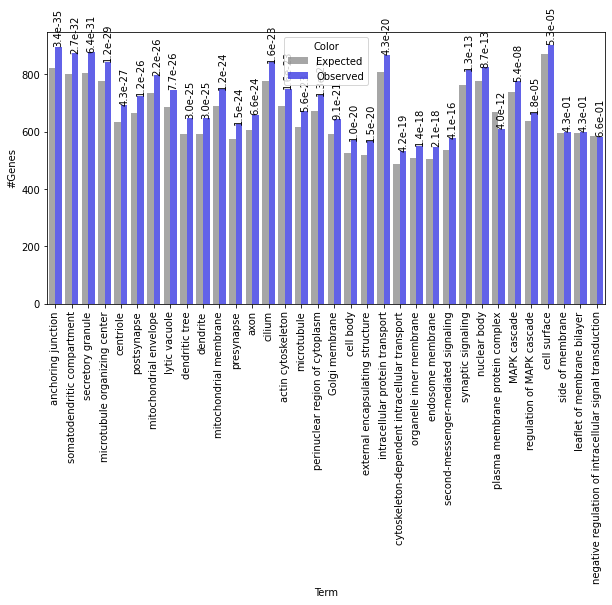

In [34]:
terms=go_data.get_go_term_subset('GO:0110165', min_size=500)
_ = go_data.go_enrichment(comp2_nodes, terms =terms, plot=True)

Terms excluded: 0


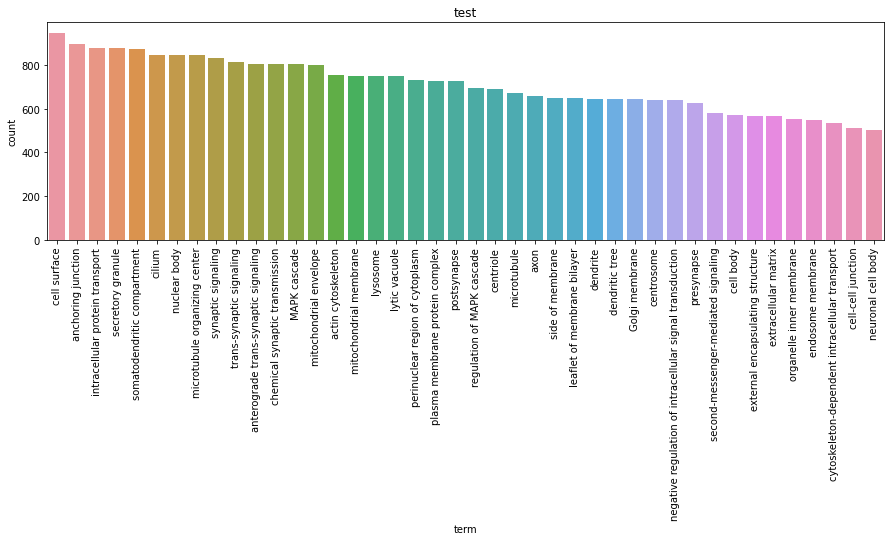

In [104]:
_ = go_data.plot_go_counts(terms=go_data.get_go_term_subset('GO:0110165', min_size=500), plot_title="test")

Terms excluded: 203


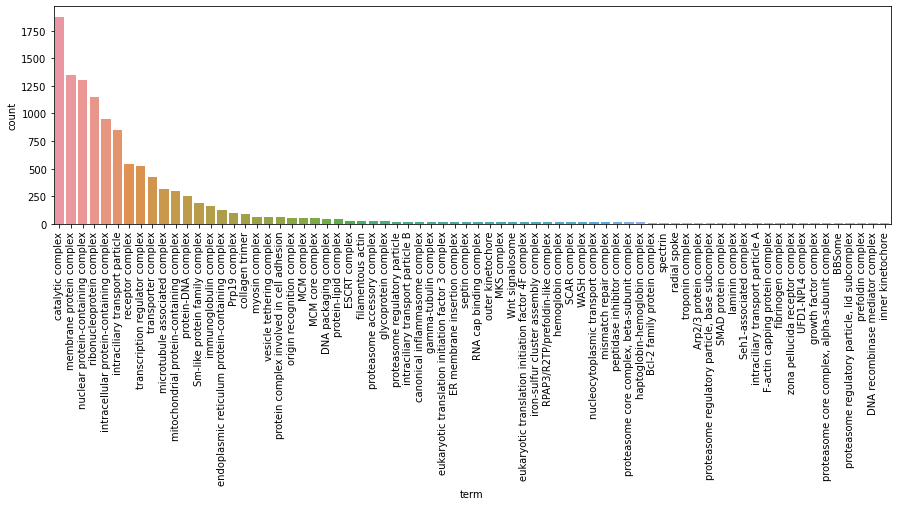

In [440]:
_ = go_data.plot_go_counts(root_term='GO:0032991', min_gene=7)

## Molecular Function

In [465]:
for term in go_data.get_subterms("GO:0003674"):
    print(term, ":", go_data.to_name(term))

GO:0003774 : cytoskeletal motor activity
GO:0003824 : catalytic activity
GO:0005198 : structural molecule activity
GO:0005215 : transporter activity
GO:0005488 : binding
GO:0016209 : antioxidant activity
GO:0031386 : protein tag
GO:0038024 : cargo receptor activity
GO:0044092 : negative regulation of molecular function
GO:0044093 : positive regulation of molecular function
GO:0044183 : protein folding chaperone
GO:0044868 : modulation by host of viral molecular function
GO:0045182 : translation regulator activity
GO:0045735 : nutrient reservoir activity
GO:0052055 : modulation by symbiont of host molecular function
GO:0060089 : molecular transducer activity
GO:0060090 : molecular adaptor activity
GO:0065009 : regulation of molecular function
GO:0090729 : toxin activity
GO:0098772 : molecular function regulator activity
GO:0140104 : molecular carrier activity
GO:0140110 : transcription regulator activity
GO:0140223 : general transcription initiation factor activity
GO:0140299 : small mo

Terms excluded: 10


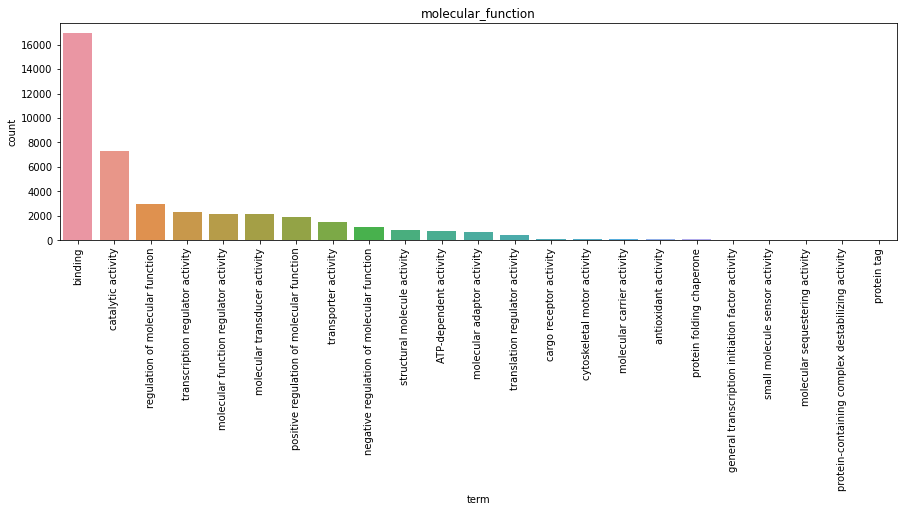

In [466]:
_ = go_data.plot_go_counts(root_term='GO:0003674', min_gene=10)

Terms excluded: 22


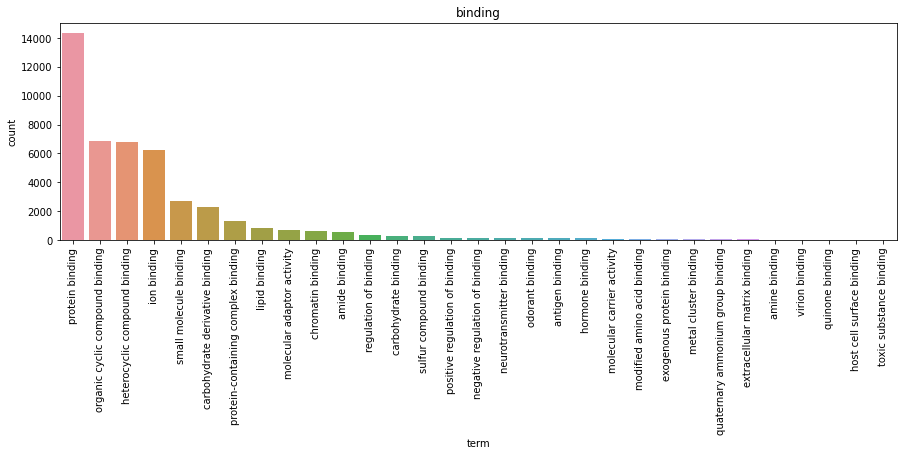

In [467]:
_ = go_data.plot_go_counts(root_term='GO:0005488', min_gene=10)

## Biological Process

Terms excluded: 0


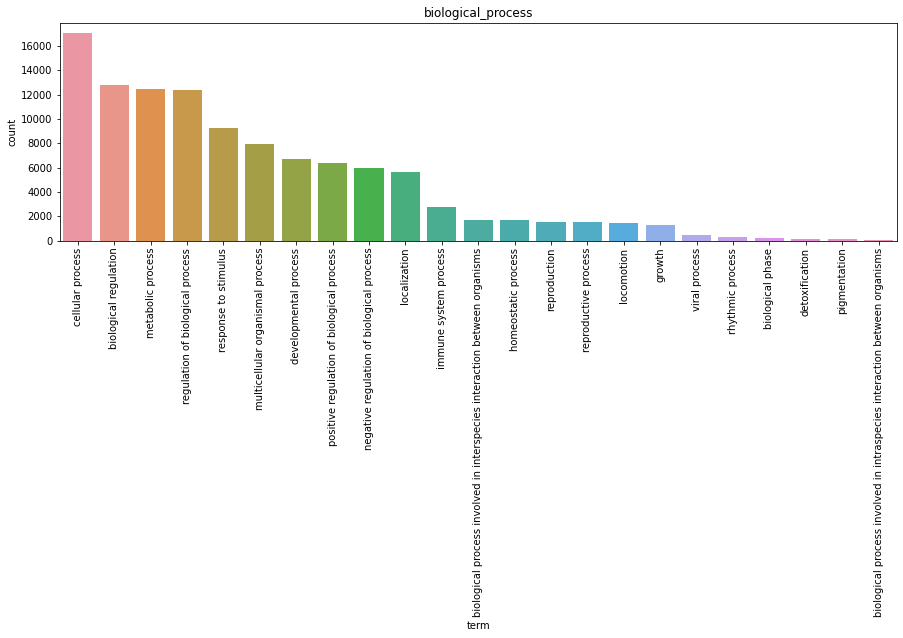

In [468]:
_ = go_data.plot_go_counts(root_term='GO:0008150', min_gene=10)


# Get Uniprot annotation with pagination

In [90]:
import requests
from requests.adapters import HTTPAdapter, Retry

re_next_link = re.compile(r'<(.+)>; rel="next"')
retries = Retry(total=5, backoff_factor=0.25, status_forcelist=[500, 502, 503, 504])
session = requests.Session()
session.mount("https://", HTTPAdapter(max_retries=retries))

def get_next_link(headers):
    if "Link" in headers:
        match = re_next_link.match(headers["Link"])
        if match:
            return match.group(1)

def get_batch(batch_url):
    count = 0
    while batch_url:
        count += 1
        print(count)
        response = session.get(batch_url)
        response.raise_for_status()
        total = response.headers["x-total-results"]
        yield response, total
        batch_url = get_next_link(response.headers)

url = 'https://rest.uniprot.org/uniprotkb/search?fields=xref_geneid,length,mass&format=tsv&query=%28%28organism_id%3A9606%29%29&size=1000'
results = {}
for batch, total in get_batch(url):
    for line in batch.text.splitlines()[1:]:
        data = line.split("\t")
        if len(data[0]) > 0 :
            geneid = data[0].split(";")
            if geneid[1] == '':
                results[int(geneid[0])] = {'aa_length':int(data[1]), 'mass':int(data[2])}
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.to_csv("/cellar/users/snwright/Data/Network_Analysis/Reference_Data/Uniprot_length_mass.tsv", sep="\t")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [87]:
pd.DataFrame.from_dict(results, orient='index')

,aa_length,mass
23074,1464,164199
102724631,581,65710
645104,232,25446
79658,786,89375
340069,330,37158
...,...,...
386679,255,25616
386680,271,27537
386678,298,30243
5881,192,21379
